In [99]:
 import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# Add every font at the specified location
font_dir = ['/Users/royjara/Downloads/Roboto']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
rcParams['font.family'] = 'Roboto'
rcParams['font.weight'] = 'normal'

In [3]:
import os
from pathlib import Path

pkl_file = Path(os.getcwd())
pkl_file = pkl_file.parents[0] / 'dict' / 'pickled-dict-full.pkl'
print(pkl_file)

unpickle_dict = pd.read_pickle(pkl_file)
l2_rewrites = list(set(unpickle_dict.explode('rewrite').reset_index(drop=True)['rewrite'].dropna().to_list()))
l2_rewrites = [x.strip() for x in l2_rewrites]

/Users/royjara/dev/hci_lab/journal/dict/pickled-dict-full.pkl


In [4]:
cat_dict_labels = {"L2a":'Understanding Judgement', "L2b":'Understanding Cognitive Distortions', "L2c":'Understanding Harmful Self-talk', "L2d":'Understanding Common Symptom Indicators/emotions', "L2e":'Understanding Pronoun Perspectives', "L2f":'Understanding Healthy Patterns'}

In [5]:
with open('analysisresults.pickle', 'rb') as handle:
        analysis_results = pickle.load(handle)

In [6]:
df = pd.DataFrame(analysis_results)
# drop all writing samples,
df = df.drop(df[df['title'] == 'Writing Sample'].index)

In [7]:
df.head(2)

,filename,title,start_time,n_characters,n_words,content,espresso_analysis,duration,pauses,L2_toggleOn_list,L2_toggleOff_list,concat2,L1_toggleOn_list,L1_toggleOff_list,L1_events_list,df_highlights,df_placeholder,concat1b,popup_evts,sidebar_evts
0,report_P8.json,Feelings about the uncertainty and anxiety,2022-07-12 01:54:00.623,2237,412,Feeling worse than yesterday. I kept wasting m...,"{'L2a': 1, 'L2b': 8, 'L2c': 0, 'L2d': 0, 'L2e'...",16.753918,"{'plot': True, 'count': 35, 'pauselist_idx': [...",[136],[],index timestamp type keycode ...,[136],[],[],timestamp type keycode ...,timestamp type keycode ...,level_0 index timestamp type keycod...,[],[]
1,report_P8.json,things about uncertainty_v2,2022-07-12 05:13:36.530,1188,221,This is the version with AI assisted. \n\nAs s...,"{'L2a': 1, 'L2b': 1, 'L2c': 0, 'L2d': 0, 'L2e'...",15.087017,"{'plot': True, 'count': 31, 'pauselist_idx': [...","[35, 830, 1121]","[829, 831]",index timestamp type keycode ...,"[35, 834]",[833],"[824, 825, 826, 827]",timestamp type keycode ...,timestamp type keycode ...,level_0 index timestamp type keycod...,"[127, 128]",[]


In [8]:
plot_results = [x for x in analysis_results if 'pauses' in x]

In [9]:
plot_results[2].keys()

dict_keys(['filename', 'title', 'start_time', 'n_characters', 'n_words', 'content', 'espresso_analysis', 'duration', 'pauses', 'L2_toggleOn_list', 'L2_toggleOff_list', 'concat2', 'L1_toggleOn_list', 'L1_toggleOff_list', 'L1_events_list', 'df_highlights', 'df_placeholder', 'concat1b', 'popup_evts', 'sidebar_evts'])

0 : report_P8.json --- Feelings about the uncertainty and anxiety, ---concat1b: (3072, 15)
1 : report_P8.json --- things about uncertainty_v2, ---concat1b: (1689, 18)
2 : report_P8.json --- Last day but a good day, ---concat1b: (2552, 18)
3 : report_P5.json --- 7/11 with AI, ---concat1b: (3624, 18)
4 : report_P5.json --- 7/11 no AI, ---concat1b: (4868, 15)
5 : report_P5.json --- 7/12, ---concat1b: (3883, 18)
6 : report_P5.json --- 7/13, ---concat1b: (1204, 18)
7 : report_P6.json --- Happiness is short-lived, ---concat1b: (3722, 18)
8 : report_P6.json --- Leadership & Perspective, ---concat1b: (1757, 18)
9 : report_P6.json --- Stress, ---concat1b: (2141, 18)
10 : report_P7.json --- future, ---concat1b: (64, 18)
11 : report_P7.json --- Parents, ---concat1b: (3465, 18)


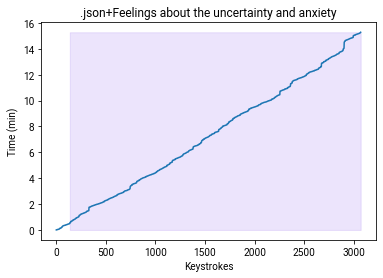

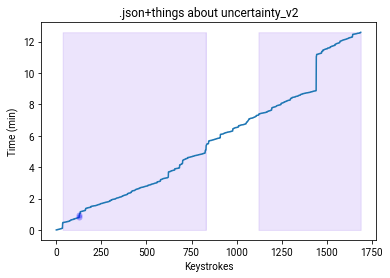

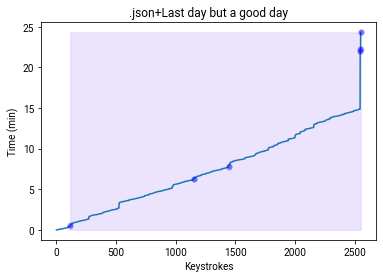

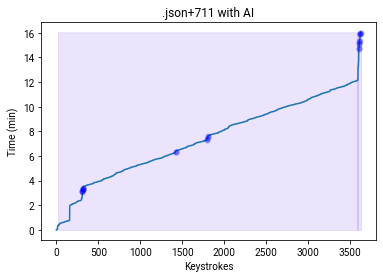

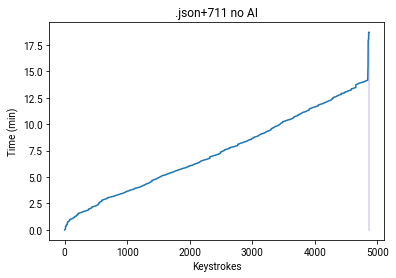

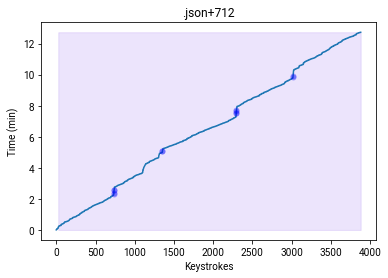

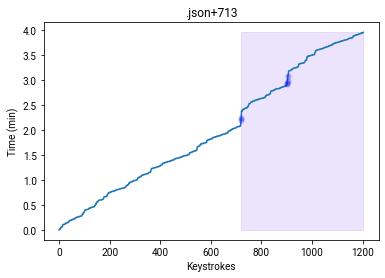

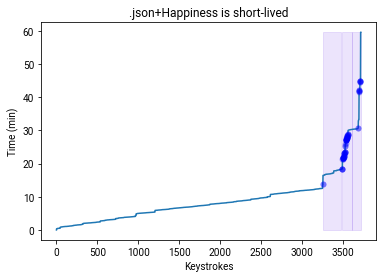

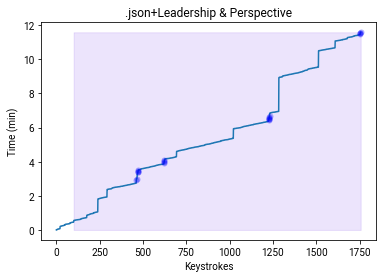

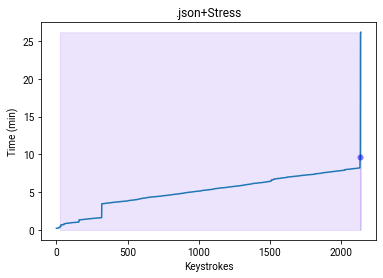

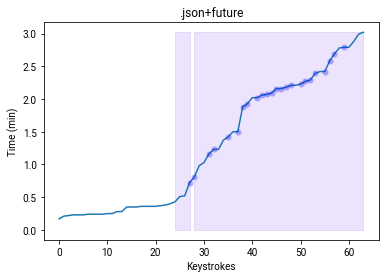

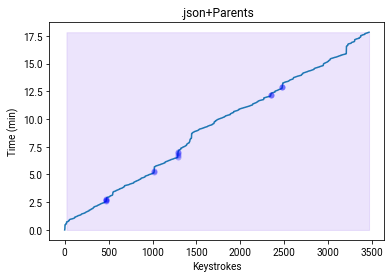

In [29]:
# L2 + popups

for idx, user in enumerate(plot_results):
    try:
        print(f"{idx} : {user['filename']} --- {user['title']}, ---concat1b: {user['concat1b'].shape}")
        dummy = plot_results[idx]['concat1b']
        dummy_pop = plot_results[idx]['popup_evts']
        dummy_togOn = plot_results[idx]['L2_toggleOn_list']
        dummy_togOff = plot_results[idx]['L2_toggleOff_list']
        
        plt.figure()
        
        fname = f"L2+popup+{user['filename']}+{user['title']}.png".replace("/","")
        
        (dummy['timestamp']/(1000.0*60)).round(2).plot(marker='o', markevery=dummy_pop, markeredgewidth=0, markerfacecolor=(0,0,1,0.3), markersize=6)
        plt.xlabel('Keystrokes', fontfamily='Roboto', fontweight='normal')
        plt.ylabel('Time (min)', fontfamily='Roboto', fontweight='normal')
        plt.title(fname[18:-4], fontfamily='Roboto', fontweight='normal')
        
        y_max = (dummy['timestamp']/(1000.0*60)).max()

        for enum, val in enumerate(dummy_togOn):
            try:
                start_idx = val
                end_idx = dummy_togOff[enum]
                if 'report_P7' in user['filename'] and user['title']=='future' and start_idx == 24:
                    end_idx = 28
            except IndexError:
                if not enum == len(dummy_togOn)-1: #last
                    end_idx = dummy_togOn[enum+1]-1
                else:
                    end_idx = len(dummy["timestamp"])
            # print(f"start_idx {start_idx}, end_idx: {end_idx}")
            plt.fill_between([x for x in range(start_idx,end_idx)], 0, y_max, color=(129/255, 76/255, 235/255,1), alpha=0.15, zorder=0)
        
        plt.savefig(re.sub(r"\s+", "",fname), dpi=300)
        
    except Exception as e:
        print(f"Failed to plot {e}")

0 : report_P8.json --- Feelings about the uncertainty and anxiety, ---concat1b: (3072, 15)
1 : report_P8.json --- things about uncertainty_v2, ---concat1b: (1689, 18)
2 : report_P8.json --- Last day but a good day, ---concat1b: (2552, 18)
3 : report_P5.json --- 7/11 with AI, ---concat1b: (3624, 18)
4 : report_P5.json --- 7/11 no AI, ---concat1b: (4868, 15)
5 : report_P5.json --- 7/12, ---concat1b: (3883, 18)
6 : report_P5.json --- 7/13, ---concat1b: (1204, 18)
7 : report_P6.json --- Happiness is short-lived, ---concat1b: (3722, 18)
8 : report_P6.json --- Leadership & Perspective, ---concat1b: (1757, 18)
9 : report_P6.json --- Stress, ---concat1b: (2141, 18)
10 : report_P7.json --- future, ---concat1b: (64, 18)
11 : report_P7.json --- Parents, ---concat1b: (3465, 18)


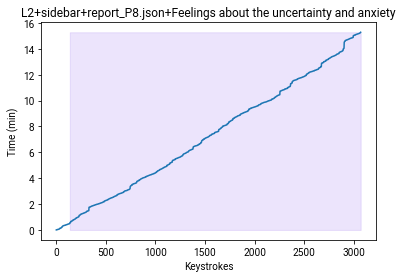

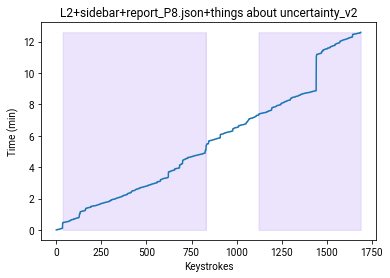

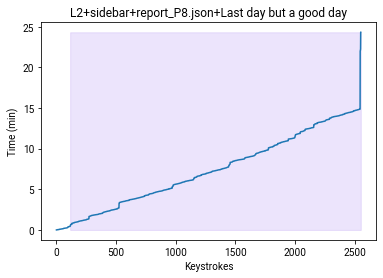

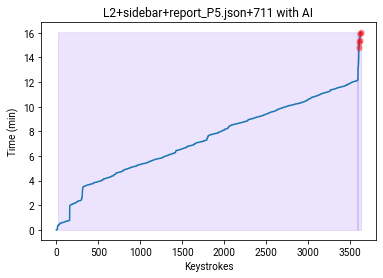

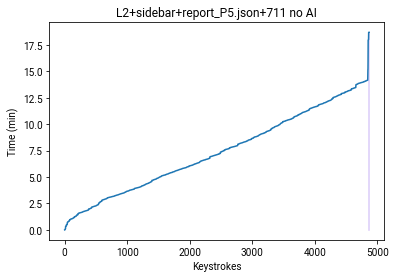

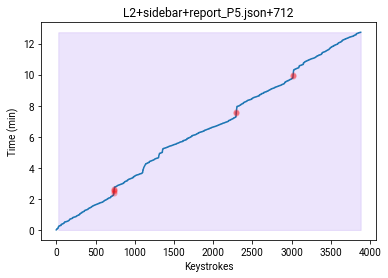

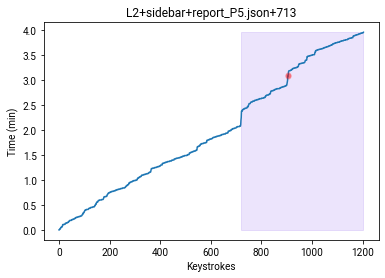

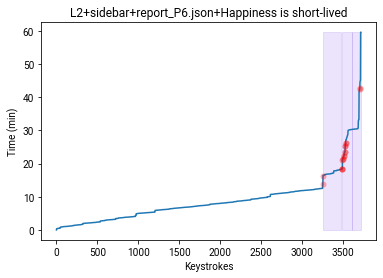

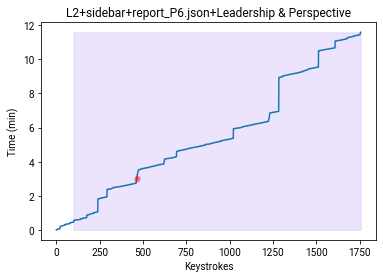

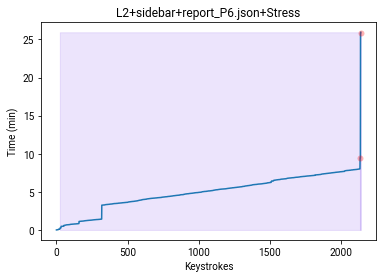

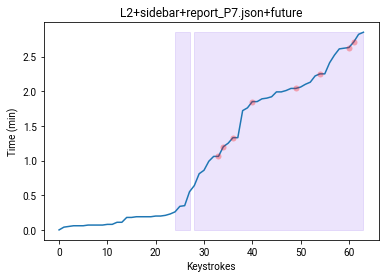

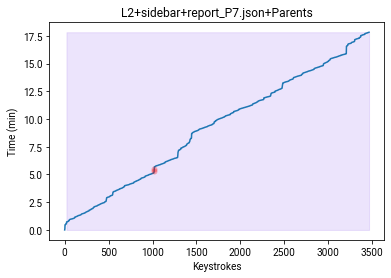

In [30]:
# L2 + sidebar

for idx, user in enumerate(plot_results):
    try:
        print(f"{idx} : {user['filename']} --- {user['title']}, ---concat1b: {user['concat1b'].shape}")
        dummy = plot_results[idx]['concat1b']
        dummy_pop = plot_results[idx]['sidebar_evts']
        dummy_togOn = plot_results[idx]['L2_toggleOn_list']
        dummy_togOff = plot_results[idx]['L2_toggleOff_list']
        
        plt.figure()
        
        fname = f"L2+sidebar+{user['filename']}+{user['title']}.png".replace("/","")
        dummy['timestamp'] = dummy['timestamp'] - min(dummy['timestamp'])
        
        (dummy['timestamp']/(1000.0*60)).round(2).plot(marker='o', markevery=dummy_pop, markeredgewidth=0, markerfacecolor=(1,0,0,0.3), markersize=6)
        plt.xlabel('Keystrokes', fontfamily='Roboto', fontweight='normal')
        plt.ylabel('Time (min)', fontfamily='Roboto', fontweight='normal')
        plt.title(fname[:-4], fontfamily='Roboto', fontweight='normal')
        
        y_max = (dummy['timestamp']/(1000.0*60)).max()

        for enum, val in enumerate(dummy_togOn):
            try:
                start_idx = val
                end_idx = dummy_togOff[enum]
                if 'report_P7' in user['filename'] and user['title']=='future' and start_idx == 24:
                    end_idx = 28
            except IndexError:
                if not enum == len(dummy_togOn)-1: #last
                    end_idx = dummy_togOn[enum+1]-1
                else:
                    end_idx = len(dummy["timestamp"])
            # print(f"start_idx {start_idx}, end_idx: {end_idx}")
            plt.fill_between([x for x in range(start_idx,end_idx)], 0, y_max, color=(129/255, 76/255, 235/255,1), alpha=0.15, zorder=0)
        
        plt.savefig(re.sub(r"\s+", "",fname), dpi=300)
        
    except Exception as e:
        print(f"Failed to plot {e}")

0 : report_P8.json --- Feelings about the uncertainty and anxiety, ---concat2: (3072, 15)
1 : report_P8.json --- things about uncertainty_v2, ---concat2: (1689, 15)
2 : report_P8.json --- Last day but a good day, ---concat2: (2543, 15)
3 : report_P5.json --- 7/11 with AI, ---concat2: (3596, 15)
4 : report_P5.json --- 7/11 no AI, ---concat2: (4870, 15)
5 : report_P5.json --- 7/12, ---concat2: (3864, 15)
6 : report_P5.json --- 7/13, ---concat2: (1197, 15)
7 : report_P6.json --- Happiness is short-lived, ---concat2: (3646, 15)
8 : report_P6.json --- Leadership & Perspective, ---concat2: (1736, 15)
9 : report_P6.json --- Stress, ---concat2: (2137, 15)
10 : report_P7.json --- future, ---concat2: (34, 15)
11 : report_P7.json --- Parents, ---concat2: (3450, 15)


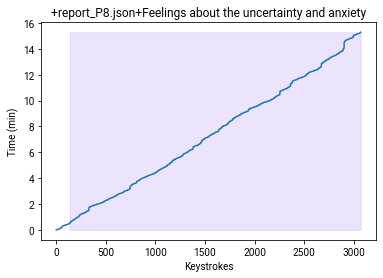

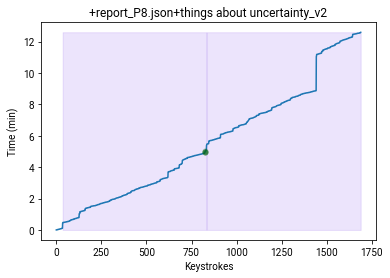

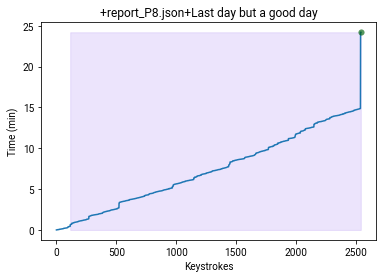

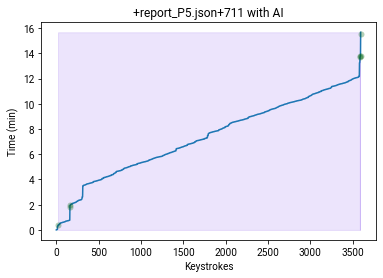

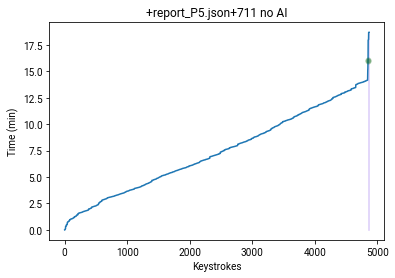

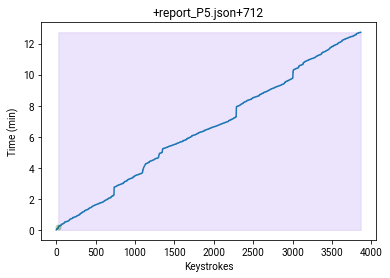

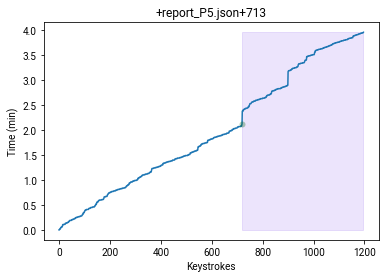

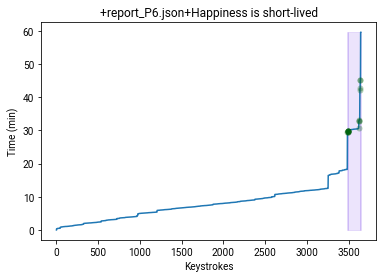

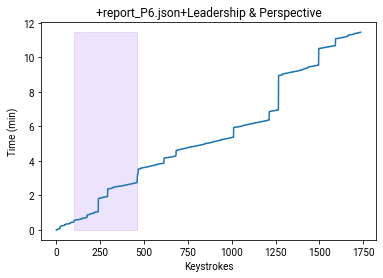

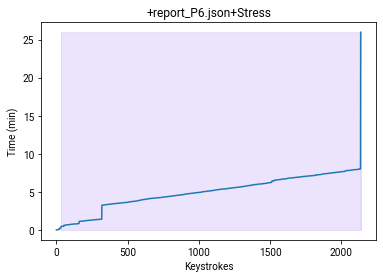

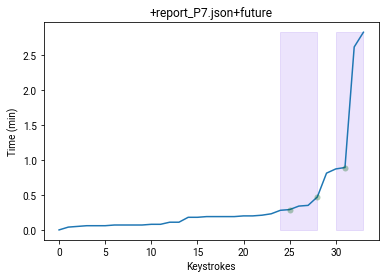

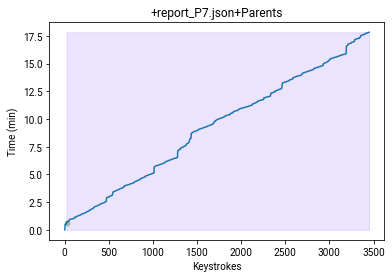

In [12]:
# L1 + Manual Triggers

for idx, user in enumerate(plot_results):
    try:
        print(f"{idx} : {user['filename']} --- {user['title']}, ---concat2: {user['concat2'].shape}")
        dummy = plot_results[idx]['concat2']
        dummy_manual = plot_results[idx]['L1_events_list']
        dummy_togOn = plot_results[idx]['L1_toggleOn_list']
        dummy_togOff = plot_results[idx]['L1_toggleOff_list']
        
        plt.figure()
        
        fname = f"new_plots/L1+manual+{user['filename']}+{user['title']}.png".replace("/","")
        dummy['timestamp'] = dummy['timestamp'] - min(dummy['timestamp'])
        
        (dummy['timestamp']/(1000.0*60)).round(2).plot(marker='o', markevery=dummy_manual, markeredgewidth=0, markerfacecolor=(0,99/255,12/255,0.3), markersize=6)
        plt.xlabel('Keystrokes', fontfamily='Roboto', fontweight='normal')
        plt.ylabel('Time (min)', fontfamily='Roboto', fontweight='normal')
        plt.title(fname[18:-4], fontfamily='Roboto', fontweight='normal')
        
        y_max = (dummy['timestamp']/(1000.0*60)).max()

        for enum, val in enumerate(dummy_togOn):
            try:
                start_idx = val
                end_idx = dummy_togOff[enum]
                if 'report_P7' in user['filename'] and user['title']=='future' and start_idx == 24:
                    end_idx = 28
            except IndexError:
                if not enum == len(dummy_togOn)-1: #last
                    end_idx = dummy_togOn[enum+1]-1
                else:
                    end_idx = len(dummy["timestamp"])
            # print(f"start_idx {start_idx}, end_idx: {end_idx}")
            plt.fill_between([x for x in range(start_idx,end_idx)], 0, y_max, color=(129/255, 76/255, 235/255,1), alpha=0.15, zorder=0)
        
        plt.savefig(re.sub(r"\s+", "",fname), dpi=300)
        
    except Exception as e:
        print(f"Failed to plot {e}")

0 : report_P8.json --- Feelings about the uncertainty and anxiety, ---concat2: (3072, 15)
n_l1 locations: 93
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/1882460435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


1 : report_P8.json --- things about uncertainty_v2, ---concat2: (1689, 15)
n_l1 locations: 32
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/1882460435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


2 : report_P8.json --- Last day but a good day, ---concat2: (2543, 15)
n_l1 locations: 136
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/1882460435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


3 : report_P5.json --- 7/11 with AI, ---concat2: (3596, 15)
n_l1 locations: 22
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/1882460435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


4 : report_P5.json --- 7/11 no AI, ---concat2: (4870, 15)
n_l1 locations: 4
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/1882460435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


5 : report_P5.json --- 7/12, ---concat2: (3864, 15)
n_l1 locations: 42
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/1882460435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


6 : report_P5.json --- 7/13, ---concat2: (1197, 15)
n_l1 locations: 14
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/1882460435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


7 : report_P6.json --- Happiness is short-lived, ---concat2: (3646, 15)
n_l1 locations: 0
n_l2 locations: 123


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/1882460435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


8 : report_P6.json --- Leadership & Perspective, ---concat2: (1736, 15)
n_l1 locations: 1
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/1882460435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


9 : report_P6.json --- Stress, ---concat2: (2137, 15)
Failed to plot 'df_placeholder'
10 : report_P7.json --- future, ---concat2: (34, 15)
Failed to plot 'df_placeholder'
11 : report_P7.json --- Parents, ---concat2: (3450, 15)
n_l1 locations: 204
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/1882460435.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


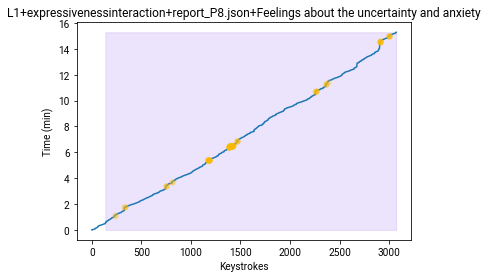

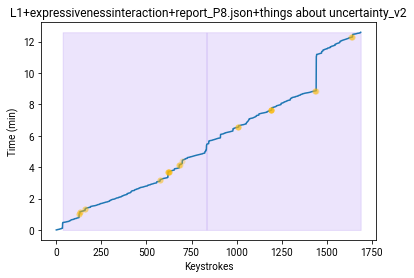

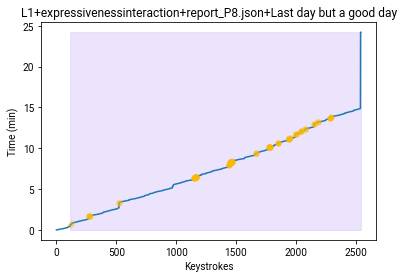

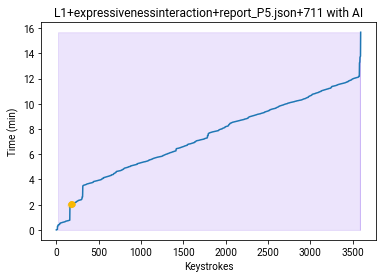

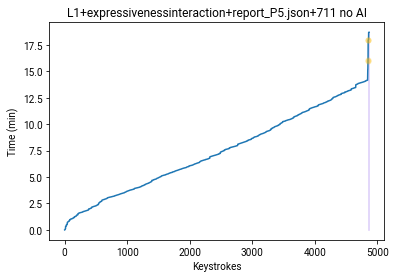

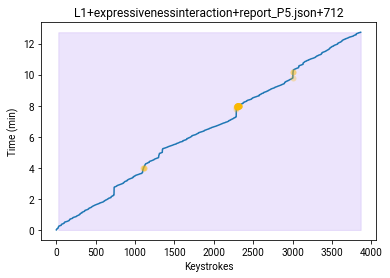

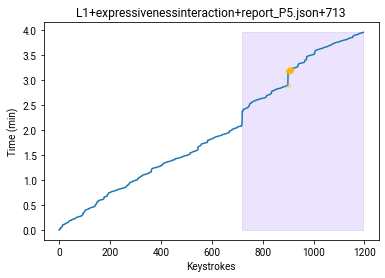

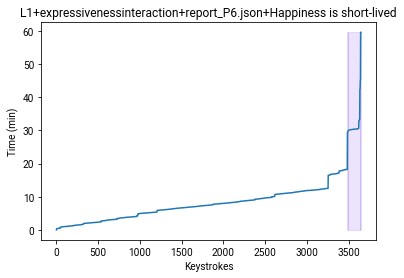

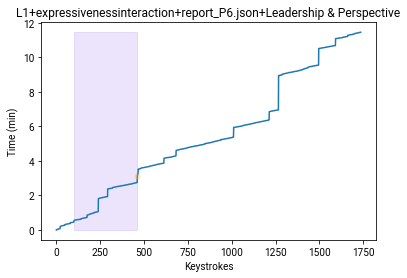

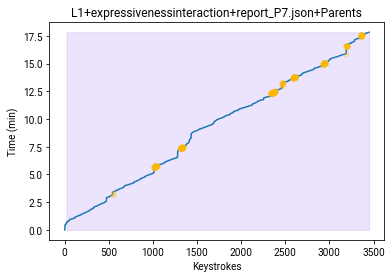

In [31]:
# L1 + Expressiveness sesh

for idx, user in enumerate(plot_results):
    try:
        print(f"{idx} : {user['filename']} --- {user['title']}, ---concat2: {user['concat2'].shape}")
        dummy = plot_results[idx]['concat2']
        dummy_manual = plot_results[idx]['L1_events_list']
        dummy_togOn = plot_results[idx]['L1_toggleOn_list']
        dummy_togOff = plot_results[idx]['L1_toggleOff_list']
        dummy_placeholder = plot_results[idx]['df_placeholder']
        # dummy_highlights = plot_results[idx]['df_highlights']
        
        plt.figure()
        
        fname = f"L1+expressivenessinteraction+{user['filename']}+{user['title']}.png".replace("/","")
        dummy['timestamp'] = dummy['timestamp'] - min(dummy['timestamp'])
        
        temp_conc_df = pd.concat([dummy, dummy_placeholder]).sort_values(by='timestamp')
        ph_locations = temp_conc_df[temp_conc_df['tag1'] == 'placeholder']
        ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)

        ph_l1_locations = ph_locations[ph_locations['isl2'] == False]
        ph_l2_locations = ph_locations[ph_locations['isl2'] == True]
        
        print(f"n_l1 locations: {len(ph_l1_locations)}")
        print(f"n_l2 locations: {len(ph_l2_locations)}")

        (dummy['timestamp']/(1000.0*60)).plot(marker='o', markevery=ph_l1_locations.index, markeredgewidth=0, markerfacecolor=(252/255, 186/255, 3/255,0.3), markersize=6)
        plt.xlabel('Keystrokes', fontfamily='Roboto', fontweight='normal')
        plt.ylabel('Time (min)', fontfamily='Roboto', fontweight='normal')
        plt.title(fname[:-4], fontfamily='Roboto', fontweight='normal')
        
        y_max = (dummy['timestamp']/(1000.0*60)).max()

        for enum, val in enumerate(dummy_togOn):
            try:
                start_idx = val
                end_idx = dummy_togOff[enum]
                if 'report_P7' in user['filename'] and user['title']=='future' and start_idx == 24:
                    end_idx = 28
            except IndexError:
                if not enum == len(dummy_togOn)-1: #last
                    end_idx = dummy_togOn[enum+1]-1
                else:
                    end_idx = len(dummy["timestamp"])
            # print(f"start_idx {start_idx}, end_idx: {end_idx}")
            plt.fill_between([x for x in range(start_idx,end_idx)], 0, y_max, color=(129/255, 76/255, 235/255,1), alpha=0.15, zorder=0)
        
        plt.savefig(re.sub(r"\s+", "",fname), dpi=300)
        
    except Exception as e:
        print(f"Failed to plot {e}")

0 : report_P8.json --- Feelings about the uncertainty and anxiety, ---concat1b: (3072, 15)
temp_conc_df['tag0'][0] nan
temp_conc_df['tag1'][0] nan
n_l1 locations: 93
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/3998463033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


1 : report_P8.json --- things about uncertainty_v2, ---concat1b: (1689, 18)
temp_conc_df['tag0'][0] nan
temp_conc_df['tag1'][0] nan
n_l1 locations: 32
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/3998463033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


2 : report_P8.json --- Last day but a good day, ---concat1b: (2552, 18)
temp_conc_df['tag0'][0] nan
temp_conc_df['tag1'][0] nan
n_l1 locations: 136
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/3998463033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


3 : report_P5.json --- 7/11 with AI, ---concat1b: (3624, 18)
temp_conc_df['tag0'][0] nan
temp_conc_df['tag1'][0] nan
n_l1 locations: 22
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/3998463033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


4 : report_P5.json --- 7/11 no AI, ---concat1b: (4868, 15)
temp_conc_df['tag0'][0] nan
temp_conc_df['tag1'][0] nan
n_l1 locations: 4
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/3998463033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


5 : report_P5.json --- 7/12, ---concat1b: (3883, 18)
temp_conc_df['tag0'][0] nan
temp_conc_df['tag1'][0] nan
n_l1 locations: 42
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/3998463033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


6 : report_P5.json --- 7/13, ---concat1b: (1204, 18)
temp_conc_df['tag0'][0] nan
temp_conc_df['tag1'][0] nan
n_l1 locations: 14
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/3998463033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


7 : report_P6.json --- Happiness is short-lived, ---concat1b: (3722, 18)
temp_conc_df['tag0'][0] nan
temp_conc_df['tag1'][0] nan
n_l1 locations: 0
n_l2 locations: 123


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/3998463033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


8 : report_P6.json --- Leadership & Perspective, ---concat1b: (1757, 18)
temp_conc_df['tag0'][0] nan
temp_conc_df['tag1'][0] nan
n_l1 locations: 1
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/3998463033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


9 : report_P6.json --- Stress, ---concat1b: (2141, 18)
Failed to plot 'df_placeholder'
10 : report_P7.json --- future, ---concat1b: (64, 18)
Failed to plot 'df_placeholder'
11 : report_P7.json --- Parents, ---concat1b: (3465, 18)
temp_conc_df['tag0'][0] nan
temp_conc_df['tag1'][0] nan
n_l1 locations: 204
n_l2 locations: 0


/var/folders/vf/hjtk1bb946xbhqv76gy6k_zr0000gn/T/ipykernel_4421/3998463033.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)


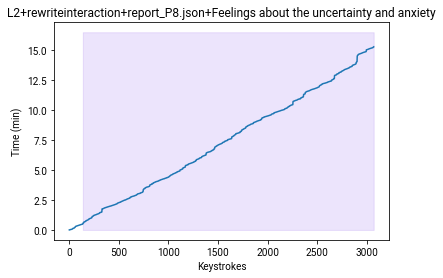

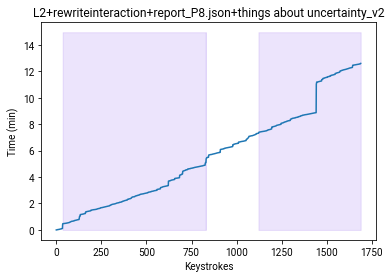

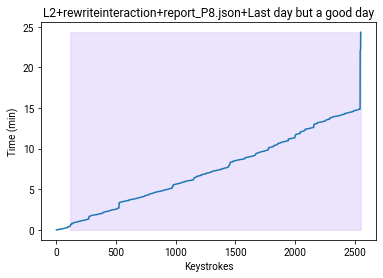

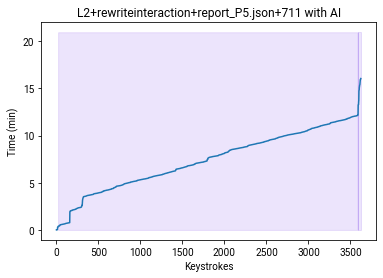

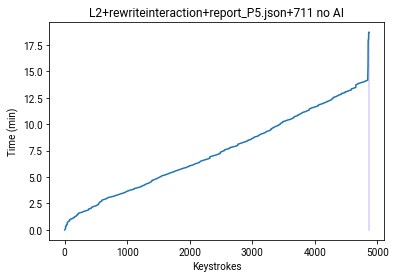

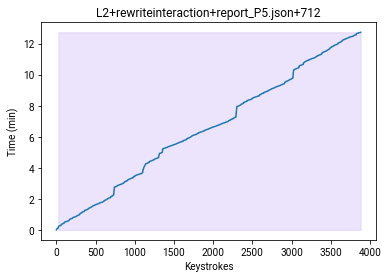

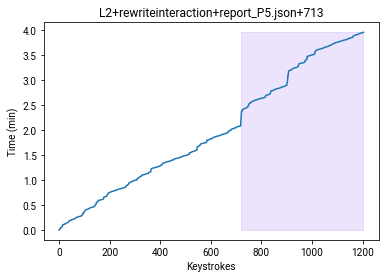

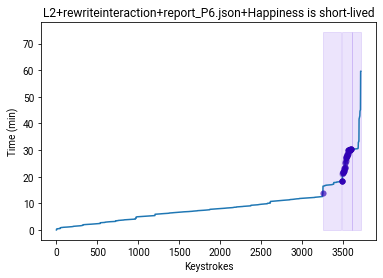

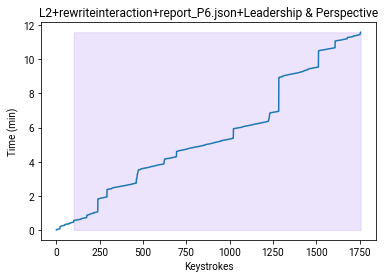

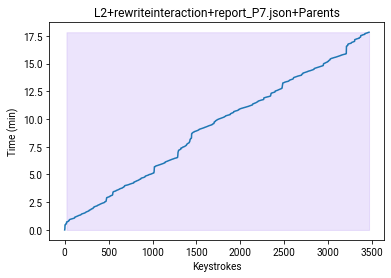

In [32]:
# L2 + Rewrite sesh

for idx, user in enumerate(plot_results):
    try:
        print(f"{idx} : {user['filename']} --- {user['title']}, ---concat1b: {user['concat1b'].shape}")
        dummy = plot_results[idx]['concat1b']
        dummy_togOn = plot_results[idx]['L2_toggleOn_list']
        dummy_togOff = plot_results[idx]['L2_toggleOff_list']
        
        dummy_placeholder = plot_results[idx]['df_placeholder']
        
        plt.figure()
        
        fname = f"L2+rewriteinteraction+{user['filename']}+{user['title']}.png".replace("/","")
        dummy['timestamp'] = dummy['timestamp'] - min(dummy['timestamp'])
        
        temp_conc_df = pd.concat([dummy, dummy_placeholder]).sort_values(by='timestamp')
        print(f"temp_conc_df['tag0'][0] {temp_conc_df['tag0'][0]}")
        print(f"temp_conc_df['tag1'][0] {temp_conc_df['tag1'][0]}")
        ph_locations = temp_conc_df[temp_conc_df['tag1'] == 'placeholder']
        ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)

        ph_l1_locations = ph_locations[ph_locations['isl2'] == False]
        ph_l2_locations = ph_locations[ph_locations['isl2'] == True]
        
        print(f"n_l1 locations: {len(ph_l1_locations)}")
        print(f"n_l2 locations: {len(ph_l2_locations)}")

        (dummy['timestamp']/(1000.0*60)).plot(marker='o', markevery=ph_l2_locations.index, markeredgewidth=0, markerfacecolor=(48/255, 0/255, 181/255,0.3), markersize=6)
        plt.xlabel('Keystrokes', fontfamily='Roboto', fontweight='normal')
        plt.ylabel('Time (min)', fontfamily='Roboto', fontweight='normal')
        plt.title(fname[:-4], fontfamily='Roboto', fontweight='normal')
        
        y_max = (temp_conc_df['timestamp']/(1000.0*60)).max()

        for enum, val in enumerate(dummy_togOn):
            try:
                start_idx = val
                end_idx = dummy_togOff[enum]
                if 'report_P7' in user['filename'] and user['title']=='future' and start_idx == 24:
                    end_idx = 28
            except IndexError:
                if not enum == len(dummy_togOn)-1: #last
                    end_idx = dummy_togOn[enum+1]-1
                else:
                    end_idx = len(dummy["timestamp"])
            # print(f"start_idx {start_idx}, end_idx: {end_idx}")
            plt.fill_between([x for x in range(start_idx,end_idx)], 0, y_max, color=(129/255, 76/255, 235/255,1), alpha=0.15, zorder=0)
        
        plt.savefig(re.sub(r"\s+", "",fname), dpi=300)
        
    except Exception as e:
        print(f"Failed to plot {e}")

In [15]:
temp_conc_df[temp_conc_df['tag1'] == 'placeholder']

,level_0,index,timestamp,type,keycode,cursor,text,marks,placeholder,dismisses,...,word,duration,popup_title,tag0,from0,to0,tag1,from1,to1,highlighted
543,NaN,NaN,209917.8,type,66.0,"{'line': 0, 'ch': 393, 'sticky': None}","Compared to other Indian parents, my parents h...","[{'tag': 'L2-highlight', 'from': {'line': 0, '...",The long-term implications of this can be...,"[{'timestamp': 1657809051235, 'type': 'start'}...",...,NaN,NaN,NaN,L2-highlight,"{'line': 0, 'ch': 312}","{'line': 0, 'ch': 317}",placeholder,"{'line': 0, 'ch': 393}","{'line': 0, 'ch': 436}",he long-term implications of this can be...
544,NaN,NaN,210046.2,type,16.0,"{'line': 0, 'ch': 393, 'sticky': None}","Compared to other Indian parents, my parents h...","[{'tag': 'L2-highlight', 'from': {'line': 0, '...",The long-term implications of this can be...,"[{'timestamp': 1657809051235, 'type': 'start'}...",...,NaN,NaN,NaN,L2-highlight,"{'line': 0, 'ch': 312}","{'line': 0, 'ch': 317}",placeholder,"{'line': 0, 'ch': 393}","{'line': 0, 'ch': 436}",he long-term implications of this can be...
1013,NaN,NaN,351486.8,type,79.0,"{'line': 0, 'ch': 769, 'sticky': None}","Compared to other Indian parents, my parents h...","[{'tag': 'L2-highlight', 'from': {'line': 0, '...",An example to support this is...,"[{'timestamp': 1657809051235, 'type': 'start'}...",...,NaN,NaN,NaN,L2-highlight,"{'line': 0, 'ch': 731}","{'line': 0, 'ch': 737}",placeholder,"{'line': 0, 'ch': 769}","{'line': 0, 'ch': 800}",n example to support this is...
1014,NaN,NaN,351754.7,type,76.0,"{'line': 0, 'ch': 771, 'sticky': None}","Compared to other Indian parents, my parents h...","[{'tag': 'L2-highlight', 'from': {'line': 0, '...",An example to support this is...,"[{'timestamp': 1657809051235, 'type': 'start'}...",...,NaN,NaN,NaN,L2-highlight,"{'line': 0, 'ch': 731}","{'line': 0, 'ch': 737}",placeholder,"{'line': 0, 'ch': 771}","{'line': 0, 'ch': 800}",example to support this is...
1015,NaN,NaN,351863.0,type,68.0,"{'line': 0, 'ch': 772, 'sticky': None}","Compared to other Indian parents, my parents h...","[{'tag': 'L2-highlight', 'from': {'line': 0, '...",An example to support this is...,"[{'timestamp': 1657809051235, 'type': 'start'}...",...,NaN,NaN,NaN,L2-highlight,"{'line': 0, 'ch': 731}","{'line': 0, 'ch': 737}",placeholder,"{'line': 0, 'ch': 772}","{'line': 0, 'ch': 800}",xample to support this is...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,NaN,NaN,1062457.4,type,65.0,"{'line': 0, 'ch': 2500, 'sticky': None}","Compared to other Indian parents, my parents h...","[{'tag': 'L2-highlight', 'from': {'line': 0, '...","To be specific,","[{'timestamp': 1657809051235, 'type': 'start'}...",...,NaN,NaN,NaN,L2-highlight,"{'line': 0, 'ch': 1836}","{'line': 0, 'ch': 1839}",placeholder,"{'line': 0, 'ch': 2500}","{'line': 0, 'ch': 2504}","fic,"
3364,NaN,NaN,1062530.7,type,78.0,"{'line': 0, 'ch': 2500, 'sticky': None}","Compared to other Indian parents, my parents h...","[{'tag': 'L2-highlight', 'from': {'line': 0, '...","To be specific,","[{'timestamp': 1657809051235, 'type': 'start'}...",...,NaN,NaN,NaN,L2-highlight,"{'line': 0, 'ch': 1836}","{'line': 0, 'ch': 1839}",placeholder,"{'line': 0, 'ch': 2500}","{'line': 0, 'ch': 2504}","fic,"
3365,NaN,NaN,1062693.1,type,73.0,"{'line': 0, 'ch': 2501, 'sticky': None}","Compared to other Indian parents, my parents h...","[{'tag': 'L2-highlight', 'from': {'line': 0, '...","To be specific,","[{'timestamp': 1657809051235, 'type': 'start'}...",...,NaN,NaN,NaN,L2-highlight,"{'line': 0, 'ch': 1836}","{'line': 0, 'ch': 1839}",placeholder,"{'line': 0, 'ch': 2501}","{'line': 0, 'ch': 2504}","ic,"
3366,NaN,NaN,1062922.9,type,67.0,"{'line': 0, 'ch': 2503, 'sticky': None}","Compared to other Indian parents, my parents h...","[{'tag': 'L2-highlight', 'from': {'line': 0, '...","To be specific,","[{'timestamp': 1657809051235, 'type': 'start'}...",...,NaN,NaN,NaN,L2-highlight,"{'line': 0, 'ch': 1836}","{'line': 0, 'ch': 1839}",placeholder,"{

In [9]:
# TESTING for L1

idx = 7

# dummy = plot_results[idx]['concat2']
dummy_concat2 = plot_results[idx]['concat2']
dummy_concat1b = plot_results[idx]['concat1b']

dummy_manual = plot_results[idx]['L1_events_list']
dummy_togOn = plot_results[idx]['L1_toggleOn_list']
dummy_togOff = plot_results[idx]['L1_toggleOff_list']
dummy_placeholder = plot_results[idx]['df_placeholder']
dummy_pauses = plot_results[idx]['pauses']
pauselist = dummy_pauses['pauselist_idx']


# dummy_highlights = plot_results[idx]['df_highllights']

In [10]:
dummy_placeholder = plot_results[idx]['df_placeholder']
dummy_placeholder[dummy_placeholder['tag1'] == 'placeholder'].shape[0]
dummy_placeholder['isl2'] = dummy_placeholder.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)

l1_locations = dummy_placeholder[dummy_placeholder['isl2'] == False]
l2_locations = dummy_placeholder[dummy_placeholder['isl2'] == True]

In [11]:
dummy_togOn

[3484, 3495, 3633]

In [12]:
temp_conc_df = pd.concat([dummy, dummy_placholder]).sort_values(by='timestamp')
ph_locations = temp_conc_df[temp_conc_df['tag1'] == 'placeholder']
ph_locations['isl2'] = ph_locations.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)

ph_l1_locations = ph_locations[ph_locations['isl2'] == False]
ph_l2_locations = ph_locations[ph_locations['isl2'] == True]

# temp_conc_df['timestamp'].plot(marker='o', markevery=ph_l1_locations.index)
plt.plot(temp_conc_df['timestamp'], temp_conc_df.index, marker='o', markevery=pauselist[1:11])

NameError: name 'dummy' is not defined

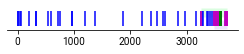

In [28]:
# COMPLETELY 1D PLOT 

fig = plt.figure()

# discrete events ---- using indices of events
pauses = pauselist
rewrite = l2_locations.index
expressiveness = l1_locations.index
sidebar = plot_results[idx]['sidebar_evts']
popup = plot_results[idx]['popup_evts']

# plt.hlines(1,1,10)  # Draw a horizontal line
plt.eventplot(pauses, orientation='horizontal', colors='b')
plt.eventplot(rewrite, orientation='horizontal', colors='g')
plt.eventplot(expressiveness, orientation='horizontal', colors='r')
plt.eventplot(sidebar, orientation='horizontal', colors='c')
plt.eventplot(popup, orientation='horizontal', colors='m')

# hide y axis
ax = plt.gca()
ax.get_yaxis().set_visible(False)

# change ylimit
plt.ylim([0.25, 1.75])
# change xlimit
# plt.xlim([0, a[-1]+20])
# remap x axis labels from index to actual timestamp values

# remove borders
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

adjustFigAspect(fig,aspect=10)


# activation windows
for enum, val in enumerate(plot_results[idx]['L1_toggleOn_list']):
        try:
            start_idx = val
            end_idx = plot_results[idx]['L1_toggleOff_list'][enum]
            if 'report_P7' in plot_results[idx]['filename'] and plot_results[idx]['title']=='future' and start_idx == 24:
                end_idx = 28
        except IndexError:
            if not enum == len(plot_results[idx]['L1_toggleOn_list'])-1: #last
                end_idx = plot_results[idx]['L1_toggleOn_list'][enum+1]-1
            else:
                end_idx = len(plot_results[idx]['concat1b']["timestamp"])
        c_purple = (129/255, 76/255, 235/255,0.15)
        plt.fill_between([x for x in range(start_idx,end_idx)], 0.3, 0.9, fc=c_purple, ec=(0,0,0,0), zorder=0)

for enum, val in enumerate(plot_results[idx]['L2_toggleOn_list']):
        try:
            start_idx = val
            end_idx = plot_results[idx]['L2_toggleOff_list'][enum]
            if 'report_P7' in plot_results[idx]['filename'] and user['title']=='future' and start_idx == 24:
                end_idx = 28
        except IndexError:
            if not enum == len(plot_results[idx]['L2_toggleOn_list'])-1: #last
                end_idx = plot_results[idx]['L2_toggleOn_list'][enum+1]-1
            else:
                end_idx = len(plot_results[idx]['concat1b']["timestamp"])
        c_green = (10/255, 246/255, 50/255,0.15)
        plt.fill_between([x for x in range(start_idx,end_idx)], 1.1, 1.7, fc=c_green, ec=(0,0,0,0), zorder=0)

plt.savefig("test_1d.png", dpi=300)


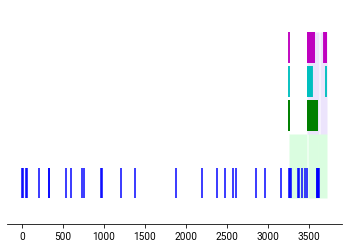

In [29]:
# 2.5D PLOT 

fig = plt.figure()

# discrete events ---- using indices of events
pauses = pauselist
expressiveness = l1_locations.index

rewrite = l2_locations.index
sidebar = plot_results[idx]['sidebar_evts']
popup = plot_results[idx]['popup_evts']

# plt.hlines(1,1,10)  # Draw a horizontal line

u_offset = 1.1
plt.eventplot(pauses, orientation='horizontal', lineoffsets=0, colors='b')
plt.eventplot(expressiveness, orientation='horizontal', lineoffsets=1*u_offset, colors='r')

plt.eventplot(rewrite, orientation='horizontal', lineoffsets=2*u_offset, colors='g')
plt.eventplot(sidebar, orientation='horizontal', lineoffsets=3*u_offset, colors='c')
plt.eventplot(popup, orientation='horizontal', lineoffsets=4*u_offset, colors='m')

# hide y axis
ax = plt.gca()
ax.get_yaxis().set_visible(False)

# change ylimit
# plt.ylim([0.25, 1.75])
# change xlimit
# plt.xlim([0, a[-1]+20])
# remap x axis labels from index to actual timestamp values

# remove borders
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# adjustFigAspect(fig,aspect=10)


# activation windows
for enum, val in enumerate(plot_results[idx]['L1_toggleOn_list']):
        try:
            start_idx = val
            end_idx = plot_results[idx]['L1_toggleOff_list'][enum]
            if 'report_P7' in plot_results[idx]['filename'] and plot_results[idx]['title']=='future' and start_idx == 24:
                end_idx = 28
        except IndexError:
            if not enum == len(plot_results[idx]['L1_toggleOn_list'])-1: #last
                end_idx = plot_results[idx]['L1_toggleOn_list'][enum+1]-1
            else:
                end_idx = len(plot_results[idx]['concat1b']["timestamp"])
        c_purple = (129/255, 76/255, 235/255,0.15)
        plt.fill_between([x for x in range(start_idx,end_idx)], 1.6, 4.9, fc=c_purple, ec=(0,0,0,0), zorder=0)

for enum, val in enumerate(plot_results[idx]['L2_toggleOn_list']):
        try:
            start_idx = val
            end_idx = plot_results[idx]['L2_toggleOff_list'][enum]
            if 'report_P7' in plot_results[idx]['filename'] and plot_results[idx]['title']=='future' and start_idx == 24:
                end_idx = 28
        except IndexError:
            if not enum == len(plot_results[idx]['L2_toggleOn_list'])-1: #last
                end_idx = plot_results[idx]['L2_toggleOn_list'][enum+1]-1
            else:
                end_idx = len(plot_results[idx]['concat1b']["timestamp"])
        c_green = (10/255, 246/255, 50/255,0.15)
        plt.fill_between([x for x in range(start_idx,end_idx)], -0.5, 1.6, fc=c_green, ec=(0,0,0,0), zorder=0)

plt.savefig("test_2_5d.png", dpi=300)


idx: 0
n_vals: 3000
old n_vals: 3072
min(ts): 1.4659833333333334
max(ts): 16.753918333333235


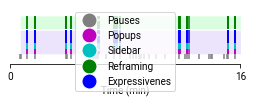

In [204]:
# 2.5D PLOT + VARIABLE HEIGHTS
for idx in range(1):
    try:
        fig = plt.figure()
        print(f"idx: {idx}")

        # preprocessing
        dummy_placeholder = plot_results[idx]['df_placeholder']
        dummy_placeholder[dummy_placeholder['tag1'] == 'placeholder'].shape[0]
        dummy_placeholder['isl2'] = dummy_placeholder.apply(lambda row: True if any(row['placeholder'] in string for string in l2_rewrites)  else False, axis=1)

        l1_locations = dummy_placeholder[dummy_placeholder['isl2'] == False]
        l2_locations = dummy_placeholder[dummy_placeholder['isl2'] == True]

        pauselist = plot_results[idx]['pauses']['pauselist_idx']

        # discrete events ---- using indices of events
        pauses = pauselist
        expressiveness = l1_locations.index

        # rewrite = l2_locations.index
        # sidebar = plot_results[idx]['sidebar_evts']
        # popup = plot_results[idx]['popup_evts']
        rewrite = expressiveness
        sidebar = expressiveness
        popup = expressiveness

        # np.concatenate([pauselist, expressiveness])
        monster = np.concatenate([pauses,expressiveness,rewrite,sidebar,popup])
        print(f"n_vals: {max(monster)}")

        plt.eventplot(pauses, orientation='horizontal', lineoffsets=-0.15, linelengths=0.2 ,colors='tab:gray')
        plt.eventplot(expressiveness, orientation='horizontal', lineoffsets=0.6, linelengths=0.5, colors='b')

        plt.eventplot(rewrite, orientation='horizontal', lineoffsets=1.15, linelengths=0.5, colors='g')
        plt.eventplot(popup, orientation='horizontal', lineoffsets=0.05, linelengths=0.2, colors='m')
        plt.eventplot(sidebar, orientation='horizontal', lineoffsets=0.25, linelengths=0.2, colors='c')

        # hide y axis
        ax = plt.gca()
        ax.get_yaxis().set_visible(False)
        
        # add y labels
        # ytick_locs = [-0.1, 0.1, 0.3, 0.6, 1.1]
        # ytick_lbls = ['Pauses','Popups','Sidebar','Reframing','Expressivenes']
        # plt.yticks(ytick_locs, ytick_lbls)

        # change ylimit
        # plt.ylim([0.25, 1.75])
        
        # change xlimit
        plt.xlim([0, max(monster)])

        # remap x axis labels from index to actual timestamp values
        n_vals = len(plot_results[idx]['concat2']["timestamp"])
        print(f"old n_vals: {n_vals}")
        tick_locs =[0,n_vals/2,n_vals]

        print(f"min(ts): {plot_results[idx]['concat1b']['timestamp'].min()/(1000*60)}")
        print(f"max(ts): {plot_results[idx]['concat1b']['timestamp'].max()/(1000*60)}")
        tick_lbls = (np.array([plot_results[idx]['concat1b']["timestamp"].iloc[0], 
                     # plot_results[idx]['concat1b']["timestamp"].iloc[n_vals//2],
                     plot_results[idx]['concat1b']["timestamp"].iloc[-1]])/(1000*60)).round().astype(int)
        tick_lbls = tick_lbls - tick_lbls[0]

        plt.xticks(tick_locs,[tick_lbls[0], '',tick_lbls[1]] )

        # labels
        plt.xlabel('Time (min)', fontfamily='Roboto', fontweight='normal')

        # remove borders
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        ax.legend([Line2D([0], [0], marker='o', color='w', label='A',
                          markerfacecolor='tab:gray', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='B',
                          markerfacecolor='m', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='C',
                          markerfacecolor='c', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='C',
                          markerfacecolor='g', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label='D',
                          markerfacecolor='b', markersize=15),], ['Pauses','Popups','Sidebar','Reframing','Expressivenes'],loc='upper center')

        adjustFigAspect(fig,aspect=4)

        # activation windows
        for enum, val in enumerate(plot_results[idx]['L1_toggleOn_list']):
                try:
                    start_idx = val
                    end_idx = plot_results[idx]['L1_toggleOff_list'][enum]
                    if 'report_P7' in plot_results[idx]['filename'] and plot_results[idx]['title']=='future' and start_idx == 24:
                        end_idx = 28
                except IndexError:
                    if not enum == len(plot_results[idx]['L1_toggleOn_list'])-1: #last
                        end_idx = plot_results[idx]['L1_toggleOn_list'][enum+1]-1
                    else:
                        end_idx = len(plot_results[idx]['concat1b']["timestamp"])
                c_green = (10/255, 246/255, 50/255, 0.15)
                plt.fill_between([x for x in range(start_idx,end_idx)], 0.9, 1.4, fc=c_green, ec=(0,0,0,0), zorder=0)

        for enum, val in enumerate(plot_results[idx]['L2_toggleOn_list']):
                try:
                    start_idx = val
                    end_idx = plot_results[idx]['L2_toggleOff_list'][enum]
                    if 'report_P7' in plot_results[idx]['filename'] and plot_results[idx]['title']=='future' and start_idx == 24:
                        end_idx = 28
                except IndexError:
                    if not enum == len(plot_results[idx]['L2_toggleOn_list'])-1: #last
                        end_idx = plot_results[idx]['L2_toggleOn_list'][enum+1]-1
                    else:
                        end_idx = len(plot_results[idx]['concat1b']["timestamp"])
                # c_green = (10/255, 246/255, 50/255, 0.15)
                c_purple = (129/255, 76/255, 235/255,0.15)
                plt.fill_between([x for x in range(start_idx,end_idx)], -0.05, 0.85, fc=c_purple, ec=(0,0,0,0), zorder=0)

        plt.savefig(f"{plot_results[idx]['filename']}+{plot_results[idx]['title']}+1_5d.png".replace("/",""), dpi=300)
        # plt.show()
    except Exception as e:
        print(f"Error {e}")
        continue

In [202]:
from matplotlib.lines import Line2D

In [163]:
plot_results[idx-2].keys()

dict_keys(['filename', 'title', 'start_time', 'n_characters', 'n_words', 'content', 'espresso_analysis', 'duration', 'pauses', 'L2_toggleOn_list', 'L2_toggleOff_list', 'concat2', 'L1_toggleOn_list', 'L1_toggleOff_list', 'L1_events_list', 'df_highlights', 'df_placeholder', 'concat1b', 'popup_evts', 'sidebar_evts'])

In [152]:
np.concatenate([pauselist, expressiveness])
# expressiveness.to_list()

array([   2,    9,   47,   56,  208,  321,  327,  537,  595,  725,  754,
        966,  975, 1206, 1382, 1876, 2202, 2378, 2474, 2579, 2616, 2855,
       2969, 3160, 3255, 3274, 3289, 3372, 3386, 3423, 3454, 3485, 3606,
       3607, 3610, 3611, 3613, 3616, 3617, 3618, 3619, 3620, 3255, 3256,
       3257, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495,
       3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506,
       3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517,
       3518, 3519, 3520, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528,
       3529, 3530, 3531, 3532, 3533, 3534, 3535, 3536, 3537, 3538, 3539,
       3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 3550,
       3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3561,
       3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3570, 3571, 3572,
       3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3583,
       3584, 3585, 3586, 3587, 3588, 3589, 3590, 35

In [146]:
xmin = plot_results[idx]['concat1b']["timestamp"].iloc[0]
xmax = plot_results[idx]['concat1b']["timestamp"].iloc[-1]
lin_length=plot_results[idx]['concat1b']["timestamp"].shape[0]

print(f"checking arr is sorted: {is_sorted(plot_results[idx]['concat1b']['timestamp'].to_list())}")
print("checking timestamp arr has no NA")
print(plot_results[idx]['concat1b']["timestamp"].shape[0] == plot_results[idx]['concat1b']["timestamp"].dropna().shape[0])
newxticks = np.linspace(xmin,xmax,lin_length)


checking arr is sorted: True
checking timestamp arr has no NA
True


In [118]:
tick_lbls

array([ 0,  7, 59])

In [100]:
is_sorted = lambda a: np.all(a[:-1] <= a[1:])

In [95]:
plot_results[idx]['concat1b']["timestamp"].shape[0]

3722

In [57]:
print(plot_results[idx]['L2_toggleOn_list'])
print(plot_results[idx]['L1_toggleOn_list'])

[3254, 3486, 3618]
[3484, 3495, 3633]


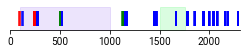

In [ ]:
fig = plt.figure()

# discrete events
pauses = pauselist
rewrite = l2_locations.index
expressiveness = l1_locations.index

# activation windows
# l2active = 
# l1active = 

# plt.hlines(1,1,10)  # Draw a horizontal line
plt.eventplot(a, orientation='horizontal', colors='b')
plt.eventplot(b, orientation='horizontal', colors='g')
plt.eventplot(c, orientation='horizontal', colors='r')
# plt.axis('off')

# hide y axis
ax = plt.gca()
ax.get_yaxis().set_visible(False)

# change ylimit
plt.ylim([0.25, 1.75])
# change xlimit
plt.xlim([0, a[-1]+20])
# remap x axis labels from index to actual timestamp values

# remove borders
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

adjustFigAspect(fig,aspect=10)

plt.fill_between([100, 1000], 0.25, 1.75, color=(129/255, 76/255, 235/255,1), alpha=0.15, zorder=0)
plt.fill_between([1500, 1750], 0.25, 1.75, color=(10/255, 246/255, 50/255,1), alpha=0.15, zorder=0)

plt.savefig("test_1d.png", dpi=300)


In [14]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

In [ ]:
print(ph_locations.shape)
print(temp_conc_df.shape)
print(ph_l1_locations.shape)
print(ph_l2_locations.shape)


In [40]:
(dummy['timestamp']/(1000.0)).plot(marker='o', markevery=ph_locations, markeredgewidth=0, markerfacecolor=(0,0,1,0.3), markersize=6)
y_max = (dummy['timestamp']/(1000.0)).max()

for enum, val in enumerate(dummy_togOn):
    try:
        start_idx = val
        end_idx = dummy_togOff[enum]
    except IndexError:
        if not enum == len(dummy_togOn)-1: #last
            end_idx = dummy_togOn[enum+1]-1
        else:
            end_idx = len(dummy["timestamp"])
    # print(f"start_idx {start_idx}, end_idx: {end_idx}")
    plt.fill_between([x for x in range(start_idx,end_idx)], 0, y_max, color='green', alpha=0.15, zorder=0)

ValueError: markevery=      index  timestamp  type  keycode                                  cursor  \
116     NaN    49258.3  type     84.0   {'line': 0, 'ch': 70, 'sticky': None}   
128     NaN    57835.9  type     76.0   {'line': 0, 'ch': 82, 'sticky': None}   
271     NaN   108404.6  type     20.0                  {'line': 0, 'ch': 156}   
272     NaN   108898.3  type     73.0  {'line': 0, 'ch': 157, 'sticky': None}   
273     NaN   108950.7  type     16.0  {'line': 0, 'ch': 157, 'sticky': None}   
...     ...        ...   ...      ...                                     ...   
2287    NaN   834907.1  type     78.0  {'line': 4, 'ch': 471, 'sticky': None}   
2288    NaN   834975.7  type     65.0  {'line': 4, 'ch': 471, 'sticky': None}   
2289    NaN   835645.4  type     75.0  {'line': 4, 'ch': 472, 'sticky': None}   
2290    NaN   835847.0  type     32.0  {'line': 4, 'ch': 474, 'sticky': None}   
2291    NaN   835859.5  type     83.0  {'line': 4, 'ch': 474, 'sticky': None}   

                                                   text  \
116   This will be my last random writing for this s...   
128   This will be my last random writing for this s...   
271   This will be my last random writing for this s...   
272   This will be my last random writing for this s...   
273   This will be my last random writing for this s...   
...                                                 ...   
2287  This will be my last random writing for this s...   
2288  This will be my last random writing for this s...   
2289  This will be my last random writing for this s...   
2290  This will be my last random writing for this s...   
2291  This will be my last random writing for this s...   

                                                  marks  \
116   [{'tag': 'L2-highlight', 'from': {'line': 0, '...   
128   [{'tag': 'L2-highlight', 'from': {'line': 0, '...   
271   [{'tag': 'L2-highlight', 'from': {'line': 0, '...   
272   [{'tag': 'L2-highlight', 'from': {'line': 0, '...   
273   [{'tag': 'L2-highlight', 'from': {'line': 0, '...   
...                                                 ...   
2287  [{'tag': 'L2-highlight', 'from': {'line': 2, '...   
2288  [{'tag': 'L2-highlight', 'from': {'line': 2, '...   
2289  [{'tag': 'L2-highlight', 'from': {'line': 2, '...   
2290  [{'tag': 'L2-highlight', 'from': {'line': 2, '...   
2291  [{'tag': 'L2-highlight', 'from': {'line': 2, '...   

                                            placeholder  \
116   Someone else may respond to this in a differen...   
128   Someone else may respond to this in a differen...   
271                           To explain it further ...   
272                           To explain it further ...   
273                           To explain it further ...   
...                                                 ...   
2287                          To explain it further ...   
2288                          To explain it further ...   
2289                          To explain it further ...   
2290                          To explain it further ...   
2291                          To explain it further ...   

                                              dismisses  \
116   [{'timestamp': 1657850342109, 'type': 'start'}...   
128   [{'timestamp': 1657850342109, 'type': 'start'}...   
271   [{'timestamp': 1657850342109, 'type': 'start'}...   
272   [{'timestamp': 1657850342109, 'type': 'start'}...   
273   [{'timestamp': 1657850342109, 'type': 'start'}...   
...                                                 ...   
2287  [{'timestamp': 1657850342109, 'type': 'start'}...   
2288  [{'timestamp': 1657850342109, 'type': 'start'}...   
2289  [{'timestamp': 1657850342109, 'type': 'start'}...   
2290  [{'timestamp': 1657850342109, 'type': 'start'}...   
2291  [{'timestamp': 1657850342109, 'type': 'start'}...   

                                                accepts  ... state autoexpr  \
116   [{'timestamp': 1657850342109, 'type': 'start'}...  ...   NaN      NaN   
128   [{'timestamp': 1657850342109, 'type': 'start'}...  ...   NaN      NaN   
271   [{'timestamp': 1657850342109, 'type': 'start'}...  ...   NaN      NaN   
272   [{'timestamp': 1657850342109, 'type': 'start'}...  ...   NaN      NaN   
273   [{'timestamp': 1657850342109, 'type': 'start'}...  ...   NaN      NaN   
...                                                 ...  ...   ...      ...   
2287  [{'timestamp': 1657850342109, 'type': 'start'}...  ...   NaN      NaN   
2288  [{'timestamp': 1657850342109, 'type': 'start'}...  ...   NaN      NaN   
2289  [{'timestamp': 1657850342109, 'type': 'start'}...  ...   NaN      NaN   
2290  [{'timestamp': 1657850342109, 'type': 'start'}...  ...   NaN      NaN   
2291  [{'timestamp': 1657850342109, 'type': 'start'}...  ...   NaN      NaN   

              tag0                   from0                     to0  \
116   L2-highlight   {'line': 0, 'ch': 13}   {'line': 0, 'ch': 15}   
128   L2-highlight   {'line': 0, 'ch': 13}   {'line': 0, 'ch': 15}   
271   L2-highlight   {'line': 0, 'ch': 13}   {'line': 0, 'ch': 15}   
272   L2-highlight   {'line': 0, 'ch': 13}   {'line': 0, 'ch': 15}   
273   L2-highlight   {'line': 0, 'ch': 13}   {'line': 0, 'ch': 15}   
...            ...                     ...                     ...   
2287  L2-highlight  {'line': 2, 'ch': 633}  {'line': 2, 'ch': 639}   
2288  L2-highlight  {'line': 2, 'ch': 633}  {'line': 2, 'ch': 639}   
2289  L2-highlight  {'line': 2, 'ch': 633}  {'line': 2, 'ch': 639}   
2290  L2-highlight  {'line': 2, 'ch': 633}  {'line': 2, 'ch': 639}   
2291  L2-highlight  {'line': 2, 'ch': 633}  {'line': 2, 'ch': 639}   

             tag1                   from1                     to1  \
116   placeholder   {'line': 0, 'ch': 70}  {'line': 0, 'ch': 120}   
128   placeholder   {'line': 0, 'ch': 82}  {'line': 0, 'ch': 133}   
271   placeholder  {'line': 0, 'ch': 156}  {'line': 0, 'ch': 181}   
272   placeholder  {'line': 0, 'ch': 157}  {'line': 0, 'ch': 181}   
273   placeholder  {'line': 0, 'ch': 157}  {'line': 0, 'ch': 181}   
...           ...                     ...                     ...   
2287  placeholder  {'line': 4, 'ch': 471}  {'line': 4, 'ch': 492}   
2288  placeholder  {'line': 4, 'ch': 471}  {'line': 4, 'ch': 492}   
2289  placeholder  {'line': 4, 'ch': 472}  {'line': 4, 'ch': 492}   
2290  placeholder  {'line': 4, 'ch': 474}  {'line': 4, 'ch': 492}   
2291  placeholder  {'line': 4, 'ch': 474}  {'line': 4, 'ch': 492}   

                                            highlighted   isl2  
116   meone else may respond to this in a different ...  False  
128   omeone else may respond to this in a different...  False  
271                           To explain it further ...  False  
272                            o explain it further ...  False  
273                            o explain it further ...  False  
...                                                 ...    ...  
2287                              xplain it further ...  False  
2288                              xplain it further ...  False  
2289                               plain it further ...  False  
2290                                 ain it further ...  False  
2291                                 ain it further ...  False  

[136 rows x 23 columns] is iterable but not a valid numpy fancy index

<Figure size 432x288 with 1 Axes>

In [174]:
# [True if 'df_placeholder' in x.keys() for x in plot_results]
len([True for x in plot_results if "df_placeholder" in x.keys()])
# get indices
# len(plot_results)
# [x for x in fruits if "a" in x]
# for item in plot_results:
#     print('df_placeholder' in item.keys())

10